# What are the most demanded skills for the top 3 most popular data roles?
#### Methodology

1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings


### 1. Clean-up skill column

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\loren\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 2. Calculate skill count based on job_title_short

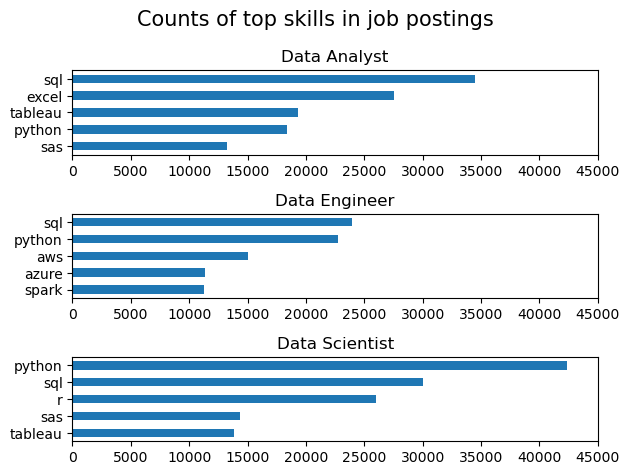

In [34]:
df_us = df[df['job_country']=='United States'].copy()
df_skills = df_us.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size() #series
df_skills_count = skills_count.reset_index(name='skill_count') # series to data frame
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)


job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

fig, ax = plt.subplots(len(job_titles),1) 

# for loop using enumerate function to iterate the index
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()  
    ax[i].set_ylabel('') 
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 45000)

fig.suptitle('Counts of top skills in job postings', fontsize=15)  #main title
fig.tight_layout() 

### 3. Calculate skill percentage

In [31]:
df_job_titles_count = df_us['job_title_short'].value_counts().reset_index(name='jobs_total')

# Merge df_skills_count with this new df with total jobs per title
df_skills_new = pd.merge(df_skills_count, df_job_titles_count, how='left', on='job_title_short')

# Create new column witht the ratio per skill
df_skills_new['skill_ratio'] = 100* (df_skills_new['skill_count'] / df_skills_new['jobs_total'])
df_skills_new

,job_skills,job_title_short,skill_count,jobs_total,skill_ratio
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


### 4. Plot final findings

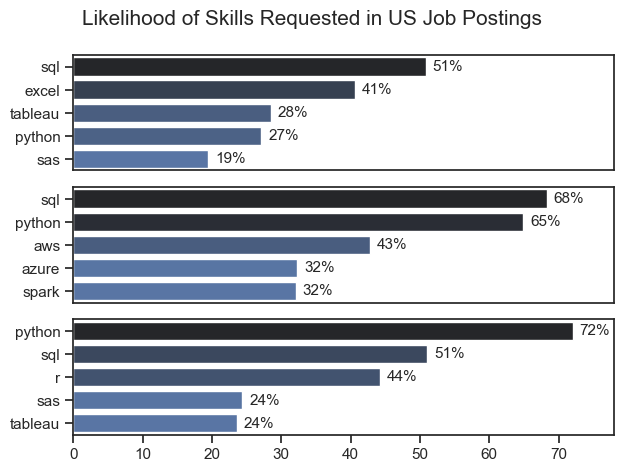

In [ ]:
import seaborn as sns

# plotting the new df
fig, ax = plt.subplots(len(job_titles),1) 

sns.set_theme(style='ticks')

# for loop using enumerate function to iterate the index
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_new[df_skills_new['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_ratio', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,78)

# add % in the chart
    for n, v in enumerate(df_plot['skill_ratio']): # indent because it is a loop inside a loop
        ax[i].text(v+1, n, f'{v:.0f}%', va='center', fontsize=11) # setting label in the charts (n is index, v is value )

# eliminating x axis values for all plots but the last one 
    if i != len(job_titles) - 1: # if condition to eliminate plots with index = 0 & 1 
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)  #main title
fig.tight_layout(h_pad=1) 
plt.show()